# The housing dataset revisited

<ul>
    <li> Wouter van de Vijver </li>
    <li> Data scientist at BeCode </li>
    <li> <a href="https://linkedin.com/in/wouter-van-de-vijver"> LinkedIn </a> </li>
    <li> <a href="https://github.com/WoutervdVijver"> GitHub </a> </li>
</ul>

The housing dataset from team [Bertlenika](https://github.com/BertramDHooge/challenge-collecting-data)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('houses.csv')
df = df.dropna(subset=['Price'])
df['Price'].isna().sum()
df_simple = df[['Living area', 'Price']]
df_simple = df_simple.dropna()

## A simple dataset

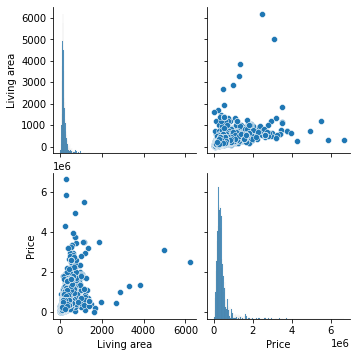

In [3]:
sns.pairplot(df_simple)

## A simple linear model

In [4]:
X = df_simple[['Living area']]
y = df_simple['Price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=76)

In [5]:
from sklearn.linear_model import LinearRegression

linear_original = LinearRegression()
linear_original.fit(X_train, y_train)

train_score =linear_original.score(X_train, y_train)
test_score =linear_original.score(X_test, y_test)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.29029314731509537
The test score is 0.2823136418298563


<AxesSubplot:xlabel='Living area', ylabel='Price'>

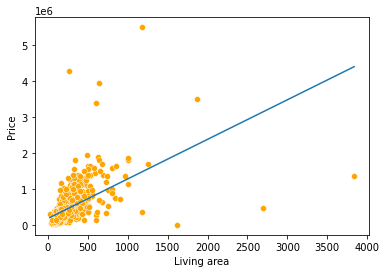

In [6]:
y_pred = linear_original.predict(X_test)
sns.scatterplot(x=X_test['Living area'], y=y_test, color='orange')
sns.lineplot(x=X_test['Living area'], y=y_pred)

# The scoring metric

$$ R^2 = 1- \frac{\sum_i({\color{red}y_i-\hat{y}_i})^2}{\sum_i(y_i-\overline{y})^2} $$

Consider we have two houses:

$$ y_1 = 200.000 $$
$$ y_2 = 2.000.000 $$

Imagine our prediction was off by 10 percent

$$ \hat{y}_1 = 220.000 $$
$$ \hat{y}_2 = 2.200.000 $$

The error is

$$ (y_1 - \hat{y}_1)^2  = (-20.000)^2 = 400 \times 10^6  $$
$$ (y_2 - \hat{y}_2)^2 = (-200.000)^2 = 40.000 \times 10^6 $$

The error for the expensive house contributes 100 times more to the error score!


**The logarithm**

$$ \log(a \times b) = \log(a) + \log(b) $$

Apply this formula on our houses

$$ \log(220.000) = \log(200.000\times {\color{red}110 \%}) = \log(200.000) + {\color{red}\log(110 \%)} $$
$$ \log(2.200.000) = \log(2.000.000\times {\color{red}110 \%}) = \log(2.000.000) + {\color{red}\log(110 \%)} $$

The error is in both cases $\log(110 \%)$. 

In general we have


$$ \log(\hat{y}_i) = \log(y_i \times {\color{red}110 \%}) = \log(y_i) + {\color{red}\log(110 \%)} $$


**Conclusion:** a $10 \%$ error is weighted equally in the $ R^2$ score for all houses

In [7]:
df_simple['Price_log'] = df_simple['Price'].apply(np.log)

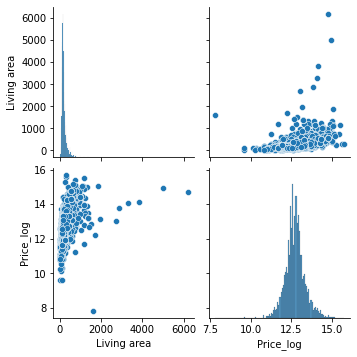

In [8]:
sns.pairplot(df_simple[['Living area', 'Price_log']])

## A simple linear model 2.0

In [9]:
X = df_simple[['Living area']]
y_log = df_simple['Price_log']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, train_size=0.8, random_state=76)

In [10]:
from sklearn.linear_model import LinearRegression

linear_log_0 = LinearRegression()
linear_log_0.fit(X_train, y_train_log)

train_score =linear_log_0.score(X_train, y_train_log)
test_score =linear_log_0.score(X_test, y_test_log)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.24885665145927127
The test score is 0.18978778503128535


<AxesSubplot:xlabel='Living area', ylabel='Price_log'>

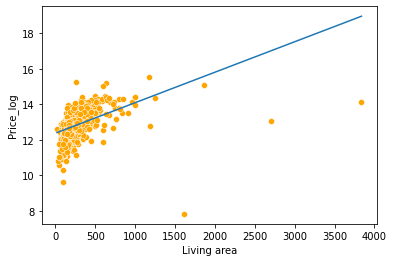

In [11]:
y_pred = linear_log_0.predict(X_test)
sns.scatterplot(x=X_test['Living area'], y=y_test_log, color='orange')
sns.lineplot(x=X_test['Living area'], y=y_pred)

<AxesSubplot:xlabel='Living area', ylabel='Price'>

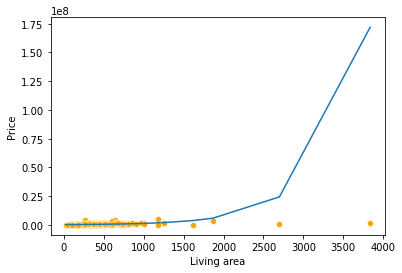

In [12]:
y_pred = linear_log_0.predict(X_test)
sns.scatterplot(x=X_test['Living area'], y=y_test, color='orange')
sns.lineplot(x=X_test['Living area'], y=np.exp(y_pred))

In [13]:
np.exp(y_pred).max()

171910556.71025056

## Feature Engineering

In [14]:
df_simple['living_log'] = df_simple['Living area'].apply(np.log)

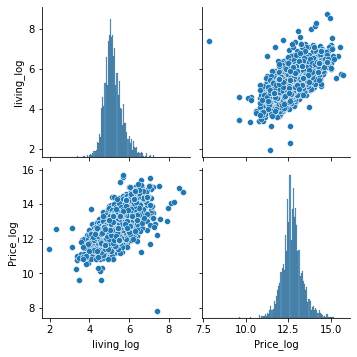

In [15]:
sns.pairplot(df_simple[['living_log', 'Price_log']])

In [16]:
X_log = df_simple[['living_log']]
y_log = df_simple['Price_log']

from sklearn.model_selection import train_test_split

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, train_size=0.8, random_state=76)

from sklearn.linear_model import LinearRegression

linear_log = LinearRegression()
linear_log.fit(X_train_log, y_train_log)

train_score =linear_log.score(X_train_log, y_train_log)
test_score =linear_log.score(X_test_log, y_test_log)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.4608536511323834
The test score is 0.39974537160968804


<AxesSubplot:xlabel='living_log', ylabel='Price_log'>

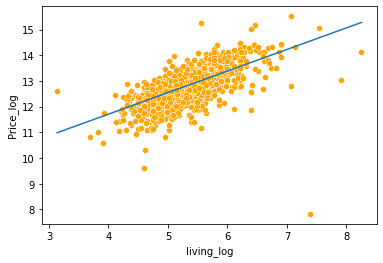

In [17]:
y_pred = linear_log.predict(X_test_log)
sns.scatterplot(x=X_test_log['living_log'], y=y_test_log, color='orange')
sns.lineplot(x=X_test_log['living_log'], y=y_pred)

<AxesSubplot:xlabel='Living area', ylabel='Price'>

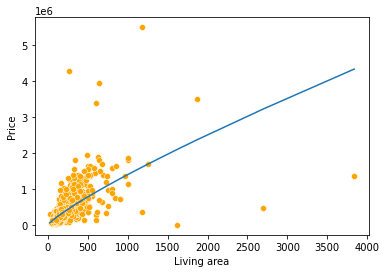

In [18]:
sns.scatterplot(x=X_test['Living area'], y=y_test, color='orange')
sns.lineplot(x=X_test['Living area'], y=np.exp(y_pred))

In [19]:
def plot_prediction(y_pred):
    sns.scatterplot(x=X_test_log['living_log'], y=y_test_log, color='orange')
    sns.lineplot(x=X_test_log['living_log'], y=y_pred)


## Model selection

In [20]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_1 = DecisionTreeRegressor(max_depth=1)
decision_tree_1.fit(X_train_log, y_train_log)

train_score =decision_tree_1.score(X_train_log, y_train_log)
test_score =decision_tree_1.score(X_test_log, y_test_log)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.28747032680051265
The test score is 0.2472726066310107


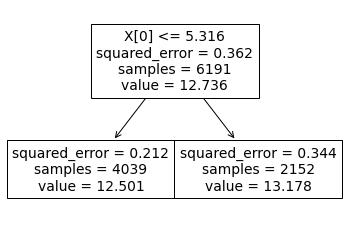

In [21]:
from sklearn.tree import plot_tree

plot_tree(decision_tree_1)
plt.show()

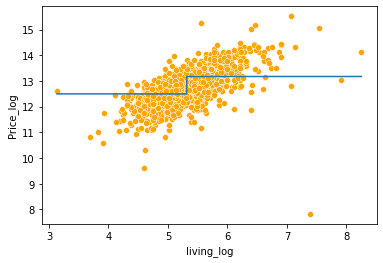

In [22]:
plot_prediction(decision_tree_1.predict(X_test_log))

In [23]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_2 = DecisionTreeRegressor(max_depth=2)
decision_tree_2.fit(X_train_log, y_train_log)

train_score =decision_tree_2.score(X_train_log, y_train_log)
test_score =decision_tree_2.score(X_test_log, y_test_log)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.41868133680724384
The test score is 0.3774742721160147


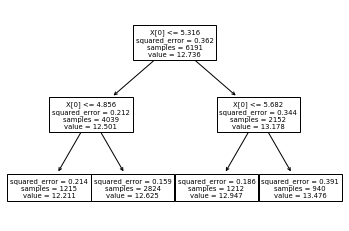

In [24]:
plot_tree(decision_tree_2)
plt.show()

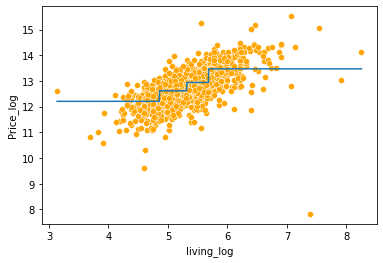

In [25]:
plot_prediction(decision_tree_2.predict(X_test_log))

In [26]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_20 = DecisionTreeRegressor(max_depth=20)
decision_tree_20.fit(X_train_log, y_train_log)

train_score =decision_tree_20.score(X_train_log, y_train_log)
test_score =decision_tree_20.score(X_test_log, y_test_log)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.5585657677477123
The test score is 0.41241201610542044


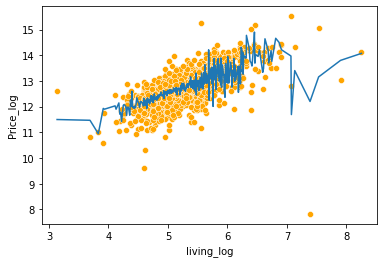

In [27]:
plot_prediction(decision_tree_20.predict(X_test_log))

### Hyperparameter tuning

In [28]:
train_scores = []
test_scores = []
models = []
for i in range(20):
    model = DecisionTreeRegressor(max_depth=i+1)
    model.fit(X_train_log, y_train_log)
    models.append(model)

    train_scores.append(model.score(X_train_log, y_train_log))
    test_scores.append(model.score(X_test_log, y_test_log))

<function matplotlib.pyplot.show(close=None, block=None)>

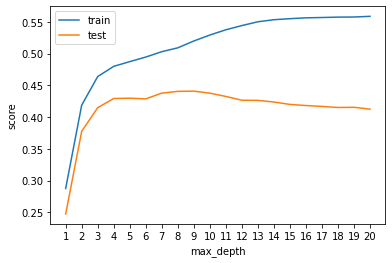

In [29]:
x_axis = np.arange(1,21,1)
plt.plot(x_axis,train_scores)
plt.plot(x_axis, test_scores)
plt.xlabel('max_depth')
plt.ylabel('score')
plt.legend(['train', 'test'])
plt.xticks(np.arange(1,21, 1))
plt.show

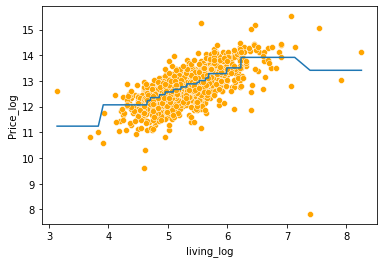

In [30]:
plot_prediction(models[3].predict(X_test_log))

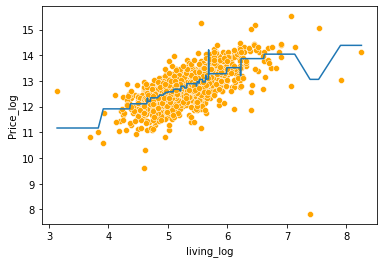

In [31]:
plot_prediction(models[4].predict(X_test_log))

## Ensemble methods

![Ensemble](./img/ensemble.png "bagging")

### Bagging

In [32]:
from sklearn.ensemble import RandomForestRegressor

random_forest_1 = RandomForestRegressor(max_depth=2, n_estimators=2)
random_forest_1.fit(X_train_log, y_train_log)

train_score =random_forest_1.score(X_train_log, y_train_log)
test_score =random_forest_1.score(X_test_log, y_test_log)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.44070367686155554
The test score is 0.39468514781520636


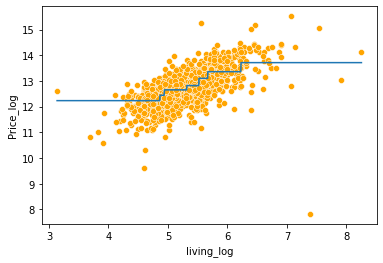

In [33]:
plot_prediction(random_forest_1.predict(X_test_log))

In [34]:
from sklearn.ensemble import RandomForestRegressor

random_forest_2 = RandomForestRegressor(max_depth=5,n_estimators=100 )
random_forest_2.fit(X_train_log, y_train_log)

train_score =random_forest_2.score(X_train_log, y_train_log)
test_score =random_forest_2.score(X_test_log, y_test_log)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.4939546527379468
The test score is 0.43366419984753946


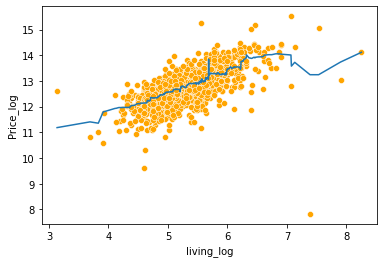

In [35]:
plot_prediction(random_forest_2.predict(X_test_log))

### Boosting

In [36]:
from sklearn.ensemble import GradientBoostingRegressor


gradient_boost_1 = GradientBoostingRegressor(max_depth=2,n_estimators=2 )
gradient_boost_1.fit(X_train_log, y_train_log)

train_score =gradient_boost_1.score(X_train_log, y_train_log)
test_score =gradient_boost_1.score(X_test_log, y_test_log)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')


The train score is 0.14485611559821576
The test score is 0.13199696402793393


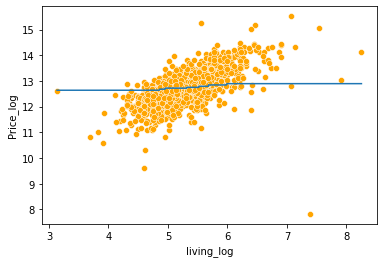

In [106]:
plot_prediction(gradient_boost_1.predict(X_test_log))

In [37]:
from sklearn.ensemble import GradientBoostingRegressor


gradient_boost_2 = GradientBoostingRegressor(max_depth=5,n_estimators=100 )
gradient_boost_2.fit(X_train_log, y_train_log)

train_score =gradient_boost_2.score(X_train_log, y_train_log)
test_score =gradient_boost_2.score(X_test_log, y_test_log)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.530596260787095
The test score is 0.44818510698904823


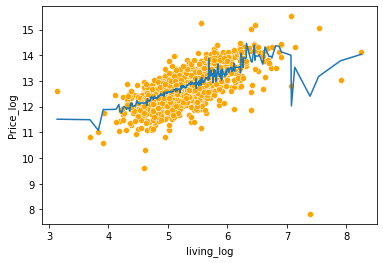

In [38]:
plot_prediction(gradient_boost_2.predict(X_test_log))

### Hyperparameter tuning

#### GridSearch

We want to find the optimal model for both max_depth, n_estimators. The values of of max_depth and n_estimators we choose, form a grid hence the name grid search.

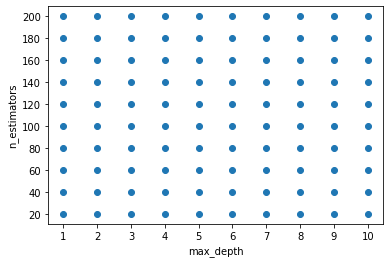

In [39]:
possible_depth = np.arange(1,11,1)
possible_estimators = np.arange(20,220,20)

xax, yax = np.meshgrid(possible_depth, possible_estimators)
plt.scatter(xax , yax)
plt.xlabel('max_depth')
plt.ylabel('n_estimators')
plt.xticks(possible_depth)
plt.yticks(possible_estimators)
plt.show()

**DANGER:**

We choose a model based on the score on the test set AND check performance of final model on the same test set.

**Solution**

Create a validation set from the training set. Score the models on the validation set. THEN check performance of the final model on the test set 

In [40]:
X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(X_train_log, y_train_log, train_size=0.75, random_state=76)

In [62]:
train_scores = []
val_scores = []
models = []
for depth in possible_depth:
    for estimators in possible_estimators:
        model = RandomForestRegressor(max_depth=depth, n_estimators=estimators)
        model.fit(X_train_log, y_train_log)
        models.append(model)

        train_scores.append(model.score(X_train_log, y_train_log))
        val_scores.append(model.score(X_val_log, y_val_log))

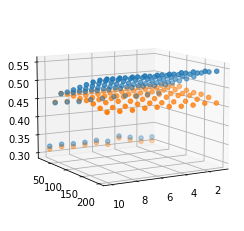

In [63]:
fig = plt.figure()

ax = plt.axes(projection="3d")

ax.scatter(xax.reshape(100), yax.reshape(100),  train_scores)
ax.scatter(xax.reshape(100), yax.reshape(100),  val_scores)

ax.view_init(10, 60)


We plotted the validation scores and training scores. It is hard to see wich one is the best and in general this is impossible to handpick. So we just pick the one with the highest validation score

In [64]:
best_model = models[val_scores.index(np.max(val_scores))]
best_model.score(X_test_log, y_test_log)

0.43132164047232335

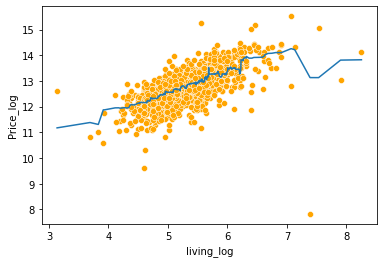

In [65]:
plot_prediction(best_model.predict(X_test_log))

In [66]:
best_model

RandomForestRegressor(max_depth=5, n_estimators=60)

#### Grid Search and Cross-validation

By introducting a validation set, the training set became smaller. To avoid this we can use cross-validation. We program this ourselves. GridSearchCV can handle the grid search and Cross validation on its own.

![cross-validation](./img/cv.png)

In [82]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, train_size=0.8, random_state=76)

#### Random Forest

In [83]:
from sklearn.model_selection import GridSearchCV

grid = {
    'max_depth': possible_depth,
    'n_estimators': possible_estimators
}

model = RandomForestRegressor()
gridsearch = GridSearchCV(model, grid)

gridsearch.fit(X_train_log, y_train_log)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])})

In [84]:
print(gridsearch.best_params_)

{'max_depth': 4, 'n_estimators': 80}


In [85]:
best_model = gridsearch.best_estimator_
train_score = best_model.score(X_train_log, y_train_log)
test_score = best_model.score(X_test_log, y_test_log)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.4847221374095292
The test score is 0.43011481215407976


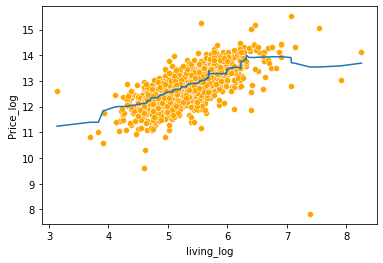

In [86]:
plot_prediction(best_model.predict(X_test_log))

#### Gradient Booster

In [72]:
from sklearn.model_selection import GridSearchCV

grid = {
    'max_depth': possible_depth,
    'n_estimators': possible_estimators
}

model = GradientBoostingRegressor()
gridsearch = GridSearchCV(model, grid)

gridsearch.fit(X_train_log, y_train_log)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 20,  40,  60,  80, 100, 120, 140, 160, 180, 200])})

In [73]:
print(gridsearch.best_params_)

{'max_depth': 1, 'n_estimators': 180}


In [81]:
best_model = gridsearch.best_estimator_
train_score = best_model.score(X_train_log, y_train_log)
test_score = best_model.score(X_test_log, y_test_log)

print(f'The train score is {train_score}')
print(f'The test score is {test_score}')

The train score is 0.48627658963860765
The test score is 0.43293626785243455


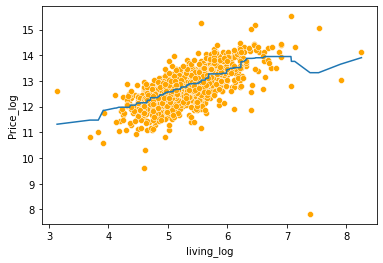

In [75]:
plot_prediction(best_model.predict(X_test_log))

<p style="text-align: center;font-size:32px">Thank you for you attention</p>